# Armazenamento de dados:
## Leitura do arquivo que contém todas as cidades da região metropolitana de Belo Horizonte e suas cidades limítrofes.

In [30]:
#Leitura de arquivo Execel-> Cidades fronteiras entre a metróple de Belo Horizonte.
#!pip install --upgrade pandas
import networkx as nx
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
df = pd.read_excel('/content/Reg_Metropol_BH (1).xlsx')
df

,Município,Fronteiras
0,Belo Horizonte,"Contagem, Ribeirão das Neves, Vespasiano, Sant..."
1,Betim,"Contagem, Ibirité, Juatuba, Mário Campos, Sarz..."
2,Caeté,"Nova União, Taquaraçu de Minas, Raposos, Rio A..."
3,Contagem,"Belo Horizonte, Betim, Esmeraldas, Ribeirão Da..."
4,Ibirité,"Belo Horizonte,Contagem,Betim,Sarzedo,Brumadinho"
5,Lagoa Santa,"Jaboticatubas, Pedro Leopoldo, Confins, Vespas..."
6,Nova Lima,"Sabará, Raposos, Rio Acima, Itabirito, Brumadi..."
7,Pedro Leopoldo,"Matozinhos, São José da Lapa, Confins, Lagoa S..."
8,Raposos,"Nova Lima, Sabará, Caeté,Rio Acima"
9,Ribeirão Das Neves,"Belo Horizonte, Contagem, Esmeraldas, Pedro Le..."


# Armazenamento de dados:
### Criação de um dicionário contendo a cidade e uma lista contendo suas cidades limítrofes.

In [31]:
#criação de um dicionário com a cidade e suas cidades limítrofes
Cidades_mp = {}
partial_Front=df['Fronteiras'].values.tolist()
Municipios=df['Município'].values.tolist()
print(partial_Front)
print(len(Municipios))
for i in range(len(Municipios)):
  Cidades_mp[Municipios[i]]=partial_Front[i].split(",")
Cidades_mp

['Contagem, Ribeirão das Neves, Vespasiano, Santa Luzia, Sabará, Nova Lima,Ibirité', 'Contagem, Ibirité, Juatuba, Mário Campos, Sarzedo, Igarapé, São Joaquim de Bicas, Esmeraldas,Belo Horizonte', 'Nova União, Taquaraçu de Minas, Raposos, Rio Acima, Santa Bárbara, Barão de Cocais, Bom Jesus do Amparo,Sabará,Belo Horizonte', 'Belo Horizonte, Betim, Esmeraldas, Ribeirão Das Neves, Ibirité', 'Belo Horizonte,Contagem,Betim,Sarzedo,Brumadinho', 'Jaboticatubas, Pedro Leopoldo, Confins, Vespasiano ,Santa Luzia', 'Sabará, Raposos, Rio Acima, Itabirito, Brumadinho,Belo Horizonte', 'Matozinhos, São José da Lapa, Confins, Lagoa Santa, Ribeirão Das Neves, Esmeraldas,Jaboticatubas', 'Nova Lima, Sabará, Caeté,Rio Acima', 'Belo Horizonte, Contagem, Esmeraldas, Pedro Leopoldo, Vespasiano, São José da Lapa', 'Caeté, Raposos, Nova Lima, Itabirito, Santa Bárbara', 'Belo Horizonte, Caeté, Nova Lima, Raposos, Taquaraçu de Minas, Santa Luzia', 'Belo Horizonte , Vespasiano, Lagoa Santa , Jaboticatubas, Taquar

{'Belo Horizonte': ['Contagem',
  ' Ribeirão das Neves',
  ' Vespasiano',
  ' Santa Luzia',
  ' Sabará',
  ' Nova Lima',
  'Ibirité'],
 'Betim': ['Contagem',
  ' Ibirité',
  ' Juatuba',
  ' Mário Campos',
  ' Sarzedo',
  ' Igarapé',
  ' São Joaquim de Bicas',
  ' Esmeraldas',
  'Belo Horizonte'],
 'Caeté': ['Nova União',
  ' Taquaraçu de Minas',
  ' Raposos',
  ' Rio Acima',
  ' Santa Bárbara',
  ' Barão de Cocais',
  ' Bom Jesus do Amparo',
  'Sabará',
  'Belo Horizonte'],
 'Contagem': ['Belo Horizonte',
  ' Betim',
  ' Esmeraldas',
  ' Ribeirão Das Neves',
  ' Ibirité'],
 'Ibirité': ['Belo Horizonte', 'Contagem', 'Betim', 'Sarzedo', 'Brumadinho'],
 'Lagoa Santa': ['Jaboticatubas',
  ' Pedro Leopoldo',
  ' Confins',
  ' Vespasiano ',
  'Santa Luzia'],
 'Nova Lima': ['Sabará',
  ' Raposos',
  ' Rio Acima',
  ' Itabirito',
  ' Brumadinho',
  'Belo Horizonte'],
 'Pedro Leopoldo': ['Matozinhos',
  ' São José da Lapa',
  ' Confins',
  ' Lagoa Santa',
  ' Ribeirão Das Neves',
  ' Esmeraldas

# Armazenamento de dados:
### Crição de um dadtaframe contendo: cidade, quantidade vitimas e o ano e mês que houve a coleta desse dados.

In [32]:
Info_municipios=pd.DataFrame()
Citys=[]
Vitms=[]
Data=[]
main_data = pd.read_excel('/content/indicadoressegurancapublicamunic.xlsx', sheet_name='MG')
for index,row in main_data.iterrows():
  if (row['Município'] in Municipios) or (row['Município'] in  partial_Front) :
    Citys.append(row['Município'])
    Vitms.append(row['Vítimas'])
    Data.append(row['Mês/Ano'])
Info_municipios['Município']=Citys
Info_municipios['Vítimas']=Vitms
Info_municipios['Mês/Ano']=Data
Info_municipios


,Município,Vítimas,Mês/Ano
0,Belo Horizonte,46,2018-01-01
1,Betim,23,2018-01-01
2,Caeté,1,2018-01-01
3,Contagem,17,2018-01-01
4,Ibirité,3,2018-01-01
...,...,...,...
835,Ribeirão Das Neves,2,2022-12-01
836,Rio Acima,0,2022-12-01
837,Sabará,1,2022-12-01
838,Santa Luzia,4,2022-12-01


# Tratamento de dados:

### Obtenção das médias de crimes nas cidades da região metropolitana em cada ano (2018 até 2022).

In [33]:
#get média por ano de crimes na região metropolitana de BH
years=[2018,2019,2020,2021,2022]
medias=[]
val=0
count=0
first = 2018
for index,row in Info_municipios.iterrows():
  val += row['Vítimas']
  if row['Mês/Ano'].year != first or (row['Município'] == 'Vespasiano' and row['Mês/Ano'].month == 12) :
    medias.append(val/12)
    val=0
    first+=1
medias

[84.5, 69.25, 65.5, 56.583333333333336, 59.25]

# Tratamento de dados:

### Obtenção da quantidade de crimes por cidade a cada ano.

In [34]:
#get Vitmas por ano per cidade  // #Vitms_Year_City[row['Município']].append()
years=[2018,2019,2020,2021,2022]
months=list(range(1,13))
aux=['Belo Horizonte','Betim','Caeté','Contagem','Ibirité','Lagoa Santa','Nova Lima','Pedro Leopoldo','Raposos','Ribeirão Das Neves','Rio Acima','Sabará','Santa Luzia','Vespasiano']
count=0
val=0
Vitms_Year_City={}
for i in aux:
  first=2018
  val=0
  for index,row in Info_municipios.iterrows():
    if i == row['Município']:
        val+=row['Vítimas']
    if row['Mês/Ano'].year != first  or (row['Município'] == 'Vespasiano' and row['Mês/Ano'].month == 12):
      Vitms_Year_City.setdefault(i,[]).append(val)
      val=0
      first+=1
Vitms_Year_City

{'Belo Horizonte': [414, 346, 316, 269, 305],
 'Betim': [126, 97, 107, 90, 79],
 'Caeté': [5, 13, 5, 4, 7],
 'Contagem': [173, 114, 106, 89, 90],
 'Ibirité': [28, 37, 35, 24, 26],
 'Lagoa Santa': [18, 20, 31, 14, 23],
 'Nova Lima': [19, 9, 18, 11, 11],
 'Pedro Leopoldo': [16, 9, 15, 8, 11],
 'Raposos': [1, 1, 0, 0, 1],
 'Ribeirão Das Neves': [106, 90, 67, 82, 65],
 'Rio Acima': [4, 0, 5, 0, 1],
 'Sabará': [27, 32, 20, 16, 22],
 'Santa Luzia': [56, 41, 36, 40, 39],
 'Vespasiano': [21, 22, 25, 32, 31]}

# Tratamento de dados:

### Há o calculo da media de crimes por ano que acontecem na região metropolitana de Belo Horizonte. Há a criação de um dataframe contendo a media de crimes em cada cidade nos 5 anos analisados e uma coluna que identifica se em relação a média de crimes por ano, a cidade se encontra acima ou abaixo da media.

In [35]:
media_per_year=round(sum(medias)/5,2)
years=['2018','2019','2020','2021','2022']
for i in range(0,14):
  df.loc[i,'Media_18-22'] = round(sum(Vitms_Year_City[aux[i]])/5,2)
  if df.loc[i,'Media_18-22'] >= media_per_year:
    df.loc[i,'Above_media'] = 'True'
  else:
    df.loc[i,'Above_media'] = 'False'
df


,Município,Fronteiras,Media_18-22,Above_media
0,Belo Horizonte,"Contagem, Ribeirão das Neves, Vespasiano, Sant...",330.0,True
1,Betim,"Contagem, Ibirité, Juatuba, Mário Campos, Sarz...",99.8,True
2,Caeté,"Nova União, Taquaraçu de Minas, Raposos, Rio A...",6.8,False
3,Contagem,"Belo Horizonte, Betim, Esmeraldas, Ribeirão Da...",114.4,True
4,Ibirité,"Belo Horizonte,Contagem,Betim,Sarzedo,Brumadinho",30.0,False
5,Lagoa Santa,"Jaboticatubas, Pedro Leopoldo, Confins, Vespas...",21.2,False
6,Nova Lima,"Sabará, Raposos, Rio Acima, Itabirito, Brumadi...",13.6,False
7,Pedro Leopoldo,"Matozinhos, São José da Lapa, Confins, Lagoa S...",11.8,False
8,Raposos,"Nova Lima, Sabará, Caeté,Rio Acima",0.6,False
9,Ribeirão Das Neves,"Belo Horizonte, Contagem, Esmeraldas, Pedro Le...",82.0,True


# Estruturalização:

### Utilizando do dataframe contendo a cidade, lista de fronteiraas, media de crimes anualmente e o identificador se a cidade está acima da media anual, há a criação de um grafo não dirigido: nós-cidades, peso associado aos nós-media anual, arestas entre nós: a condição de uma cidade ser limítrofe da outra (possuem fronteira uma com a outra), peso associado as arestas: se entre 2 cidades o peso dos nós forem acima da media anual, a aresta é marcada com True, caso contrario, False.

# Exibição:

### Através do auxílio da biblioteca Matplotlib, podemos mostrar o grafo e suas arestas entre os devidos nós.

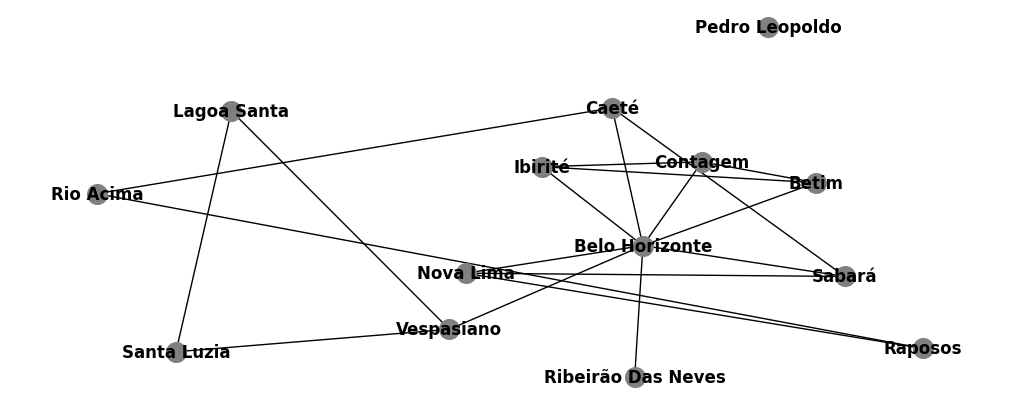

Cidades: Belo Horizonte <-> Contagem, Peso: 444.4, Acima da média: True
Cidades: Belo Horizonte <-> Ibirité, Peso: 360.0, Acima da média: True
Cidades: Belo Horizonte <-> Betim, Peso: 429.8, Acima da média: True
Cidades: Belo Horizonte <-> Caeté, Peso: 336.8, Acima da média: True
Cidades: Belo Horizonte <-> Nova Lima, Peso: 343.6, Acima da média: True
Cidades: Belo Horizonte <-> Ribeirão Das Neves, Peso: 412.0, Acima da média: True
Cidades: Belo Horizonte <-> Sabará, Peso: 353.4, Acima da média: True
Cidades: Belo Horizonte <-> Vespasiano, Peso: 356.2, Acima da média: True
Cidades: Betim <-> Contagem, Peso: 214.2, Acima da média: True
Cidades: Betim <-> Ibirité, Peso: 129.8, Acima da média: True
Cidades: Caeté <-> Sabará, Peso: 30.2, Acima da média: False
Cidades: Caeté <-> Rio Acima, Peso: 8.8, Acima da média: False
Cidades: Contagem <-> Ibirité, Peso: 144.4, Acima da média: True
Cidades: Lagoa Santa <-> Santa Luzia, Peso: 63.6, Acima da média: False
Cidades: Lagoa Santa <-> Vespasian

In [37]:
ds=[]
G = nx.Graph()
for index,row in df.iterrows():
  node=row['Município']
  weight=row['Media_18-22']
  G.add_node(node,weight=weight)

#G.add_nodes_from(Municipios)
for C1 in G.nodes():
  for C2 in G.nodes():
    if C1 != C2:
      if C2 in Cidades_mp[C1]:
        peso_aresta=round(G.nodes[C1]['weight']+G.nodes[C2]['weight'],2)
        if peso_aresta > media_per_year:
          G.add_edge(C1,C2,acima_da_media=True,weight=peso_aresta)
        else:
          G.add_edge(C1,C2,acima_da_media=False,weight=peso_aresta)
plt.figure(figsize=(10, 4))
pos = nx.spring_layout(G,k=6)
nx.draw(G, pos, with_labels=True, node_size=200, node_color='gray', font_weight='bold')
plt.show()
for u, v, data in G.edges(data=True):
    print(f"Cidades: {u} <-> {v}, Peso: {data['weight']}, Acima da média: {data['acima_da_media']}")
# nx.draw_kamada_kawai(G)
# print(G.nodes())
# print(G.edges())

# Tratamento de dados:

### Através da biblioteca NetworkX, podemos utilizar a função para obter os cliques de um determinado grafo. No caso é salvo a lista de cliques do grafo, esses cliques são interpretados como as zonas de maior periculosidade da metropole de Belo Horizonte.

In [38]:
cliques = list(nx.find_cliques(G))
cliques

[['Santa Luzia', 'Lagoa Santa', 'Vespasiano'],
 ['Pedro Leopoldo'],
 ['Raposos', 'Nova Lima'],
 ['Raposos', 'Rio Acima'],
 ['Rio Acima', 'Caeté'],
 ['Belo Horizonte', 'Sabará', 'Nova Lima'],
 ['Belo Horizonte', 'Sabará', 'Caeté'],
 ['Belo Horizonte', 'Betim', 'Contagem', 'Ibirité'],
 ['Belo Horizonte', 'Ribeirão Das Neves'],
 ['Belo Horizonte', 'Vespasiano']]

# Exibição:

### Através da biblioteca Matplotlib, podemos exibir cada subgrafo(região de alta periculosidade) individualmente.

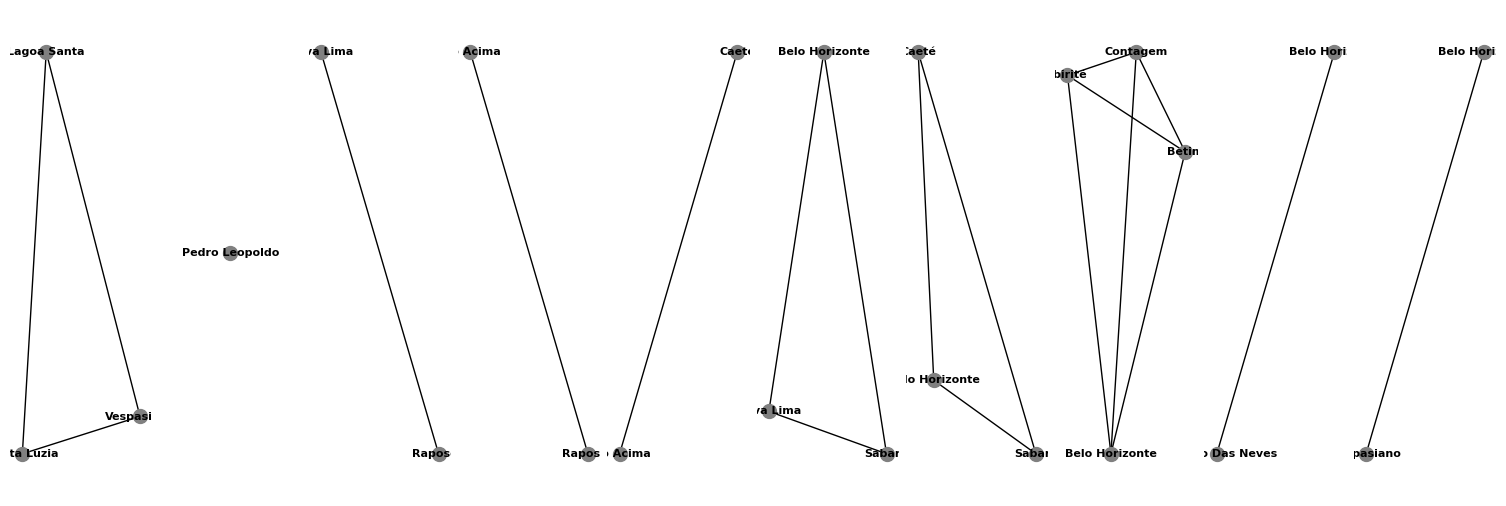

In [39]:
sub_graphs=[]
for sub in cliques:
  subgrafo=G.subgraph(sub)
  sub_graphs.append(subgrafo)
num_grafos=len(sub_graphs)
plt.figure(figsize=(15, 5))
for i, subgrafo in enumerate(sub_graphs, start=1):
    plt.subplot(1, num_grafos, i)
    nx.draw(subgrafo, pos, with_labels=True, node_size=100, node_color='gray', font_weight='bold',font_size=8)
plt.tight_layout(pad=0.5)
plt.show()